In [12]:
import pandas as pd
import numpy as np

In [98]:
import tensorflow
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [99]:
X_train.shape

(60000, 28, 28)

In [100]:
import matplotlib.pyplot as plt

(<matplotlib.image.AxesImage at 0x78e5278e38e0>, 4)

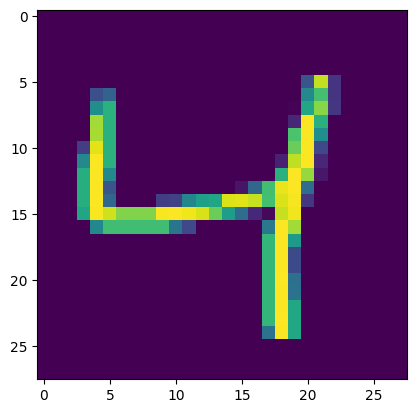

In [101]:
plt.imshow(X_train[2]),y_train[2]

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
knn=KNeighborsClassifier()

In [104]:
y_train[0]

5

In [105]:
temp=[]
for i in X_train:
  temp.append(i.flatten())
X_train=np.array(temp)

In [106]:
temp=[]
for i in X_test:
  temp.append(i.flatten())
X_test=np.array(temp)

In [107]:
type(X_train)

numpy.ndarray

In [59]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [62]:
import time
start=time.time()
y_pred=knn.predict(X_test)
print(time.time()-start)

53.24682426452637


In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9688

In [64]:
#now we will apply pca n reduce parameters and try to get this much accuracy score

In [108]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [109]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [110]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1) #n_componenets means how much pca we want, by defining None means all 784 needed

In [111]:
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [113]:
X_train_trf.shape

(60000, 1)

In [114]:
knn=KNeighborsClassifier()
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [115]:
import time
start=time.time()
y_pred=knn.predict(X_test_trf)
print(time.time()-start)

1.1131088733673096


In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.2561

In [118]:
acc=[]
for i in range(1,300):
  pca=PCA(n_components=i)
  X_train_trf=pca.fit_transform(X_train)
  X_test_trf=pca.transform(X_test)
  knn=KNeighborsClassifier()
  knn.fit(X_train_trf,y_train)
  y_pred=knn.predict(X_test_trf)
  acc.append(accuracy_score(y_test,y_pred))
  print(accuracy_score(y_test,y_pred))

0.2559
0.3199
0.5193
0.6676
0.7382
0.8348
0.8452
0.8763
0.889
0.9089
0.9153
0.9204
0.9276
0.936
0.9377
0.9386
0.9408
0.9417
0.9473
0.9467
0.9458
0.9472
0.9489
0.9492
0.9491
0.9503
0.9507
0.9521
0.9514
0.9531
0.9528
0.9539
0.9532
0.9545
0.9553
0.9553
0.9557
0.9567
0.9584
0.9587
0.958
0.9591
0.9581


KeyboardInterrupt: ignored

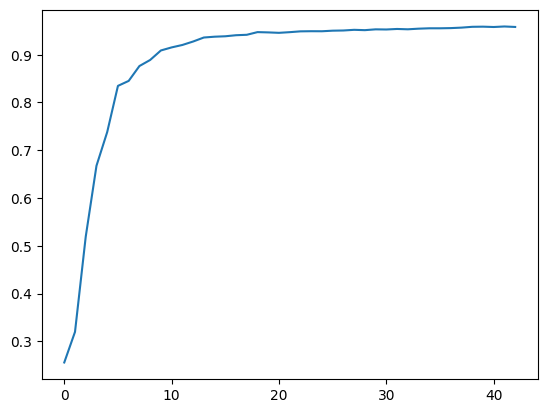

In [119]:
plt.plot(acc)

In [120]:
#pca used for dimensionality reduction and for visualisation
#above we did dimensionality reduction and now see visualisation

In [122]:
#2d
pca=PCA(n_components=2)
X_train_trf=pca.fit_transform(X_train)

X_train_trf[:3,:]

array([[-0.92199181, -4.81588058],
       [ 8.70918961, -7.75666899],
       [ 2.32783257,  9.43660747]])

In [123]:
import plotly.express as px

fig = px.scatter(x=X_train_trf[:,0], y=X_train_trf[:,1],
              color=y_train)
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [124]:
#3d
pca=PCA(n_components=3)
X_train_trf=pca.fit_transform(X_train)

X_train_trf[:3,:]

array([[-0.92228627, -4.81557552,  0.06948075],
       [ 8.70899929, -7.75405691, -3.44829395],
       [ 2.32841281,  9.43205934, -6.18591923]])

In [127]:
import plotly.express as px

fig = px.scatter_3d(x=X_train_trf[:,0], y=X_train_trf[:,1],z=X_train_trf[:,2],
              color=y_train)
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [136]:
pca.explained_variance_ #these are eigen values

array([4.04876351e+01, 2.92416975e+01, 2.68118045e+01, 2.06866182e+01,
       1.80766501e+01, 1.57331779e+01, 1.37906091e+01, 1.25175891e+01,
       1.10067953e+01, 1.00504971e+01, 9.62045779e+00, 8.63097356e+00,
       7.99159687e+00, 7.81488215e+00, 7.37553786e+00, 7.13058751e+00,
       6.71398002e+00, 6.60400749e+00, 6.40604846e+00, 6.23737743e+00,
       5.93229172e+00, 5.76059855e+00, 5.48403364e+00, 5.31859721e+00,
       5.12873534e+00, 4.96062446e+00, 4.90533662e+00, 4.70843497e+00,
       4.52919760e+00, 4.39470849e+00, 4.27522172e+00, 4.21399693e+00,
       4.09838079e+00, 4.03181137e+00, 3.97713624e+00, 3.86052409e+00,
       3.80864021e+00, 3.72563426e+00, 3.64393543e+00, 3.44169730e+00,
       3.41624517e+00, 3.36378527e+00, 3.25773631e+00, 3.23620323e+00,
       3.20478100e+00, 3.17911021e+00, 3.14205728e+00, 3.08588859e+00,
       3.06076556e+00, 3.03759974e+00, 2.90171955e+00, 2.86408562e+00,
       2.84980787e+00, 2.82374220e+00, 2.76632955e+00, 2.71778127e+00,
      

In [130]:
pca.components_ #eigen vectors

array([[-1.81453753e-18,  6.66600583e-20,  6.33935115e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 2.31920002e-17, -9.74359395e-18, -2.14836409e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-4.33962598e-17,  1.42370633e-17,  7.85231407e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [131]:
pca.components_.shape

(3, 784)

In [132]:
#finding optimum number of PC

In [134]:
#percentage of variance
pca.explained_variance_ratio_

array([0.05646717, 0.04078272, 0.0373938 ])

In [135]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)

X_train_trf=pca.fit_transform(X_train)

In [137]:
pca.explained_variance_

array([4.04876351e+01, 2.92416975e+01, 2.68118045e+01, 2.06866182e+01,
       1.80766501e+01, 1.57331779e+01, 1.37906091e+01, 1.25175891e+01,
       1.10067953e+01, 1.00504971e+01, 9.62045779e+00, 8.63097356e+00,
       7.99159687e+00, 7.81488215e+00, 7.37553786e+00, 7.13058751e+00,
       6.71398002e+00, 6.60400749e+00, 6.40604846e+00, 6.23737743e+00,
       5.93229172e+00, 5.76059855e+00, 5.48403364e+00, 5.31859721e+00,
       5.12873534e+00, 4.96062446e+00, 4.90533662e+00, 4.70843497e+00,
       4.52919760e+00, 4.39470849e+00, 4.27522172e+00, 4.21399693e+00,
       4.09838079e+00, 4.03181137e+00, 3.97713624e+00, 3.86052409e+00,
       3.80864021e+00, 3.72563426e+00, 3.64393543e+00, 3.44169730e+00,
       3.41624517e+00, 3.36378527e+00, 3.25773631e+00, 3.23620323e+00,
       3.20478100e+00, 3.17911021e+00, 3.14205728e+00, 3.08588859e+00,
       3.06076556e+00, 3.03759974e+00, 2.90171955e+00, 2.86408562e+00,
       2.84980787e+00, 2.82374220e+00, 2.76632955e+00, 2.71778127e+00,
      

In [138]:
pca.components_.shape

(784, 784)

In [139]:
pca.explained_variance_ratio_

array([5.64671692e-02, 4.07827199e-02, 3.73938042e-02, 2.88511485e-02,
       2.52110863e-02, 2.19426996e-02, 1.92334439e-02, 1.74579923e-02,
       1.53509230e-02, 1.40171960e-02, 1.34174302e-02, 1.20374194e-02,
       1.11456955e-02, 1.08992356e-02, 1.02864922e-02, 9.94486564e-03,
       9.36383280e-03, 9.21045666e-03, 8.93436778e-03, 8.69912619e-03,
       8.27363019e-03, 8.03417369e-03, 7.64845500e-03, 7.41772464e-03,
       7.15292868e-03, 6.91846831e-03, 6.84135964e-03, 6.56674546e-03,
       6.31676724e-03, 6.12919839e-03, 5.96255295e-03, 5.87716416e-03,
       5.71591699e-03, 5.62307416e-03, 5.54682002e-03, 5.38418374e-03,
       5.31182250e-03, 5.19605602e-03, 5.08211255e-03, 4.80005571e-03,
       4.76455820e-03, 4.69139360e-03, 4.54348956e-03, 4.51345787e-03,
       4.46963401e-03, 4.43383155e-03, 4.38215469e-03, 4.30381751e-03,
       4.26877901e-03, 4.23647017e-03, 4.04696121e-03, 3.99447403e-03,
       3.97456119e-03, 3.93820800e-03, 3.85813590e-03, 3.79042674e-03,
      

In [140]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05646717, 0.09724989, 0.13464369, 0.16349484, 0.18870593,
       0.21064863, 0.22988207, 0.24734006, 0.26269099, 0.27670818,
       0.29012561, 0.30216303, 0.31330873, 0.32420796, 0.33449446,
       0.34443932, 0.35380315, 0.36301361, 0.37194798, 0.3806471 ,
       0.38892074, 0.39695491, 0.40460336, 0.41202109, 0.41917402,
       0.42609249, 0.43293384, 0.43950059, 0.44581736, 0.45194656,
       0.45790911, 0.46378627, 0.46950219, 0.47512526, 0.48067208,
       0.48605627, 0.49136809, 0.49656415, 0.50164626, 0.50644631,
       0.51121087, 0.51590227, 0.52044576, 0.52495921, 0.52942885,
       0.53386268, 0.53824483, 0.54254865, 0.54681743, 0.5510539 ,
       0.55510086, 0.55909534, 0.5630699 , 0.56700811, 0.57086624,
       0.57465667, 0.57841069, 0.58211845, 0.5857679 , 0.5893609 ,
       0.59288472, 0.59636266, 0.59980677, 0.60320546, 0.606565  ,
       0.60991386, 0.6132325 , 0.61646276, 0.61962553, 0.62275797,
       0.62586528, 0.62893771, 0.63198685, 0.63501403, 0.63800

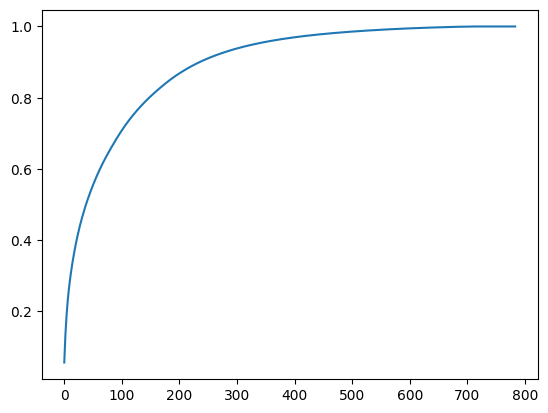

In [141]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [142]:
#between 200 300 we are getting 90percent capture of data